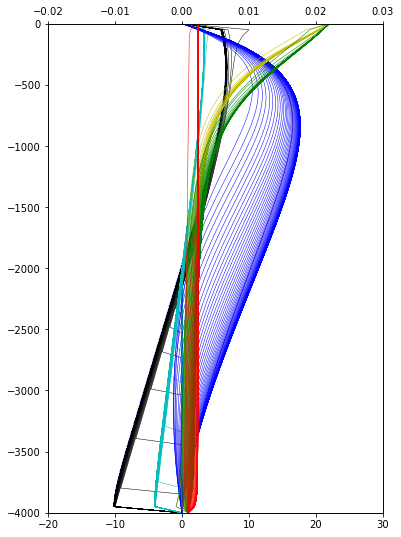

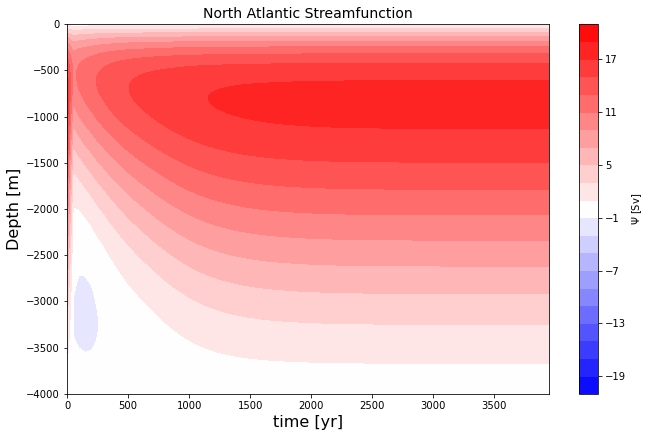

In [13]:
"""This is a separate notebook to read in updated diagnostic files from the Nadeau Jansen three column, two-basin model.
Here, we are able to plot the output of these files into readable data."""


import sys
sys.path.append('C:/../Modules')
from pymoc.modules import Psi_Thermwind, Psi_SO, Column
from pymoc.plotting import Interpolate_channel, Interpolate_twocol
import numpy as np
from matplotlib import pyplot as plt

plt.close('all')

# Load in updated reference climate (new initial conditions from end of equilibration)

DiagInit=np.load("new_initial_conditions.npz")

# Load in saved simulation data 
# We ran uniform 0.002 m/s^2, 0.004 m/s^2, and 0.006 m/s^2 surface buoyancy increase simulations, files named below. 

# 'diagp002.npz'
# 'diagp004.npz'
# 'diagp006.npz'

# Here is the 0.002 m/s^2 increase simulation:
Diag=np.load('diagp002.npz')

# Notice that some of these variables may need to be adjusted to match the simulations to be plotted:

A_Atl=7e13 #6e13  
A_north=5.5e12 # results aren't sensitive to this
A_Pac=1.7e14 #1.44e14
Lx = 1.3e+07
Latl=6./21.*Lx;
Lpac=15./21.*Lx;
K = 1800. 
N2min=2e-7
L=2e7 

y=np.asarray(np.linspace(0,3.e6, 51))
time=np.arange(0, 4000, 50)
z=np.asarray(np.linspace(-4000, 0, 80))

# load in individual arrays

Psi_AMOC_Init=1.0*DiagInit['Psi_AMOC']
Psi_SO_Atl_Init=1.0*DiagInit['Psi_SO_Atl']
Psi_SO_Pac_Init=1.0*DiagInit['Psi_SO_Pac']

Psib_AMOC=1.0*Diag['Psib_AMOC_save'][:,:]; 
bgrid_AMOC=1.0*Diag['bgrid_AMOC_save'][:,:]; 
Psi_ZOC=1.0*Diag['Psi_ZOC_save'][:,:];
Psib_ZOC=1.0*Diag['Psib_ZOC_save'][:,:]; 
bgrid_ZOC=1.0*Diag['bgrid_ZOC_save'][:,:]; 
b_Atl=1.0*Diag['b_Atl_save'][:,:]; 
b_Pac=1.0*Diag['b_Pac_save'][:,:];
b_north=1.0*Diag['b_north_save'][:,:];
Psi_SO_Atl=1.0*Diag['Psi_SO_Atl_save'][:,:];
Psi_SO_Pac=1.0*Diag['Psi_SO_Pac_save'][:,:];
Psi_AMOC=1.0*Diag['Psi_AMOC_save'][:,:];
Psi_SO_Atl=1.0*Diag['Psi_SO_Atl_save'][:,:];
Psi_SO_Pac=1.0*Diag['Psi_SO_Pac_save'][:,:];
Psi_AMOC=1.0*Diag['Psi_AMOC_save'][:,:];

# Plot stream functions against depth
fig = plt.figure(figsize=(6,9))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
# Streamfunction SV
ax1.set_xlim((-20,30))
# Surface Buoyancy
ax2.set_xlim((-0.02,0.030))
# Depth
plt.ylim((-4e3,0))

# Streamfunctions
ax1.plot(Psi_SO_Pac_Init, z, '--b', linewidth=0.5)
ax1.plot(Psi_SO_Atl_Init, z, '--g', linewidth=0.5)
ax1.plot(Psi_AMOC_Init, z, '--r', linewidth=0.5)
ax1.plot(Psi_SO_Pac, z, '-k', linewidth=0.5)
ax1.plot(Psi_SO_Atl, z, '-c', linewidth=0.5)
ax1.plot(Psi_AMOC, z, '-b', linewidth=0.5)
# Buoyancy
ax2.plot(b_Atl, z, '-y', linewidth=0.5)
ax2.plot(b_Pac, z, '-g', linewidth=0.5)
ax2.plot(b_north, z, '-r', linewidth=0.5)

#ax1.plot(Psi_ZOC, z, '-c', linewidth=0.5)
#ax1.plot(Psib_ZOC, z, '-k', linewidth=0.5)
#ax1.plot(bgrid_ZOC, z, '-k', linewidth=0.5)
#ax1.plot(bgrid_AMOC, z, '-k', linewidth=0.5)

# Hovmoller plot (plotting streamfunction as a function of depth and time): 

plevs=np.arange(-21.,23.,2.0)
fig = plt.figure(figsize=(10.8,6.8))
ax1 = fig.add_subplot(111)
CS=ax1.contourf(time,z,Psi_AMOC,levels=plevs,cmap=plt.cm.bwr)
ax1.set_xlim([0,time[-1]])
ax1.set_xlabel('time [yr]',fontsize=16)
ax1.set_ylabel('Depth [m]',fontsize=16)
ax1.set_title('North Atlantic Streamfunction',fontsize=14)
cbar=fig.colorbar(CS, label='$\Psi$ [Sv]')